## How Internet Grows Over Time(1990-2020)
<img src="https://images.unsplash.com/photo-1597733336794-12d05021d510?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=774&q=80" alt="Girl in a jacket" width="800" height="500">

## Summary Insights.
- Asia will be **(is the)** the next Power House
     - Indian's $2x$ Growth and **100 Million Boost**
- A dramatic Change after 2017
- Qatar's Boost (is it The Football World Cup?)
- A **Linear Relationship Exist** Between Users and Broadband Subscriptions

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


# For show all columns and full value of columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth',300)

# Colors
color_pal = sns.color_palette()
plt.style.use('ggplot')

import plotly.express as px
import plotly.graph_objects as go


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/internet-flow/broadband.csv
/kaggle/input/internet-flow/people.csv
/kaggle/input/internet-flow/internet.csv


### internet table

In [3]:
# Read the internet table
internet = pd.read_csv('/kaggle/input/internet-flow/internet.csv')

# Take a look at the first rows
internet.head()

,Entity,Code,Year,Internet_Usage
0,Afghanistan,AFG,1990,0.0
1,Afghanistan,AFG,1991,0.0
2,Afghanistan,AFG,1992,0.0
3,Afghanistan,AFG,1993,0.0
4,Afghanistan,AFG,1994,0.0


### people table

In [4]:
# Read the people table
people = pd.read_csv('/kaggle/input/internet-flow/people.csv')
people.head()

,Entity,Code,Year,Users
0,Afghanistan,AFG,1990,0
1,Afghanistan,AFG,1991,0
2,Afghanistan,AFG,1992,0
3,Afghanistan,AFG,1993,0
4,Afghanistan,AFG,1994,0


### broadband table

In [5]:
# Read the data
broadband = pd.read_csv('/kaggle/input/internet-flow/broadband.csv')
# Take a look at the first rows
broadband.head()

,Entity,Code,Year,Broadband_Subscriptions
0,Afghanistan,AFG,2004,0.000809
1,Afghanistan,AFG,2005,0.000858
2,Afghanistan,AFG,2006,0.001892
3,Afghanistan,AFG,2007,0.001845
4,Afghanistan,AFG,2008,0.001804


## Sanitation Check and EDA
- people table

In [6]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6379 entries, 0 to 6378
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Entity  6379 non-null   object
 1   Code    6072 non-null   object
 2   Year    6379 non-null   int64 
 3   Users   6379 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 199.5+ KB


In [7]:
people.describe()

,Year,Users
count,6379.000000,6.379000e+03
mean,2004.733344,2.787634e+07
std,8.849845,1.834876e+08
min,1990.000000,0.000000e+00
25%,1997.000000,9.176000e+03
50%,2005.000000,2.282750e+05
75%,2012.000000,3.520350e+06
max,2020.000000,4.699888e+09



- internet table

In [8]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7089 entries, 0 to 7088
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Entity          7089 non-null   object 
 1   Code            5761 non-null   object 
 2   Year            7089 non-null   int64  
 3   Internet_Usage  7089 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 221.7+ KB


In [9]:
internet.describe()

,Year,Internet_Usage
count,7089.000000,7089.000000
mean,2003.858936,20.969479
std,8.339364,27.488015
min,1990.000000,0.000000
25%,1997.000000,0.158150
50%,2004.000000,6.000000
75%,2011.000000,36.000000
max,2019.000000,99.701504


- broadband table

In [10]:
broadband.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3888 entries, 0 to 3887
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Entity                   3888 non-null   object 
 1   Code                     3617 non-null   object 
 2   Year                     3888 non-null   int64  
 3   Broadband_Subscriptions  3888 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 121.6+ KB


In [11]:
broadband.describe()

,Year,Broadband_Subscriptions
count,3888.000000,3888.000000
mean,2011.108539,10.147989
std,5.618481,12.617045
min,1998.000000,0.000000
25%,2007.000000,0.279275
50%,2011.000000,3.799865
75%,2016.000000,17.749008
max,2020.000000,78.524361


### NULL Values

- people table

In [12]:
people.isnull().sum()

Entity      0
Code      307
Year        0
Users       0
dtype: int64

- internet table

In [13]:
internet.isnull().sum()

Entity               0
Code              1328
Year                 0
Internet_Usage       0
dtype: int64

- broadband table

In [14]:
broadband.isnull().sum()

Entity                       0
Code                       271
Year                         0
Broadband_Subscriptions      0
dtype: int64

#### The Code Column is just a acronym of Entity Column (AFG --> Afghanistan, BAN --> Bangladesh).

In [15]:
refine_people = people.drop('Code', axis=1)
print('shape of people\'s table', refine_people.shape)
refine_internet = internet.drop('Code', axis=1)
print('shape of internet table', refine_internet.shape)
refine_broadband = broadband.drop('Code', axis=1)
print('shape of broadband table', refine_broadband.shape)

shape of people's table (6379, 3)
shape of internet table (7089, 3)
shape of broadband table (3888, 3)


## What are the top 5 countries with the highest internet use (by population share)?

### Summary
- A Dramatic Change after 2017.
- Qatar's Fast forward Movement after 2017.


In [16]:
df_internet = refine_internet.rename(columns={
    'Entity': 'Country'
})
display(df_internet.head())

,Country,Year,Internet_Usage
0,Afghanistan,1990,0.0
1,Afghanistan,1991,0.0
2,Afghanistan,1992,0.0
3,Afghanistan,1993,0.0
4,Afghanistan,1994,0.0


In [17]:
index = df_internet[df_internet.Country == 'World'].index
df_internet = df_internet.drop(index)

- ### Top 5 Countries with **Highest Internet Use Last 3 Years.**

In [18]:
top_5_2019_internet_usage = df_internet.groupby(['Year', 'Country'])['Internet_Usage'].sum()\
                                                                        .sort_values(ascending=False)\
                                                                        .loc[[2019]]\
                                                                        .unstack()\
                                                                        .fillna(0)\
                                                                        .iloc(axis=1)[:5].round(2)

top_5_2018 = df_internet.groupby(['Year', 'Country'])['Internet_Usage'].sum()\
                                                                        .sort_values(ascending=False)\
                                                                        .loc[[2018]]\
                                                                        .unstack()\
                                                                        .fillna(0)\
                                                                        .iloc(axis=1)[:5].round(2)


top_5_2017 = df_internet.groupby(['Year', 'Country'])['Internet_Usage'].sum()\
                                                                        .sort_values(ascending=False)\
                                                                        .loc[[2017]]\
                                                                        .unstack()\
                                                                        .fillna(0)\
                                                                        .iloc(axis=1)[:5].round(2)

In [19]:
display(top_5_2019_internet_usage)
display(top_5_2018)
display(top_5_2017)

Country,Bahrain,Qatar,Kuwait,United Arab Emirates,Denmark
Year,,,,,
2019,99.7,99.65,99.54,99.15,98.05


Country,Qatar,Kuwait,Iceland,Bahrain,United Arab Emirates
Year,,,,,
2018,99.65,99.6,99.01,98.64,98.45


Country,Liechtenstein,Bermuda,Iceland,Kuwait,Faeroe Islands
Year,,,,,
2017,99.55,98.37,98.26,98.0,97.58


>#### Verifying

In [20]:
Bermuda = df_internet[df_internet['Country'] == 'Bermuda']
Bermuda  = Bermuda[Bermuda['Year']== 2017].round(2)
Bermuda

,Country,Year,Internet_Usage
663,Bermuda,2017,98.37


In [21]:
fast_qatar = df_internet.query('Country=="Qatar"').groupby(['Year', 'Country'])['Internet_Usage'].sum()\
                                                                        .unstack()\
                                                                        .fillna(0).reset_index()
fast_qatar.head()

Country,Year,Qatar
0,1990,0.0
1,1991,0.0
2,1992,0.0
3,1993,0.0
4,1994,0.0


In [22]:
fig = px.line(
    fast_qatar, x='Year', y='Qatar', markers=True
)

fig.update_layout(title='Qatar After 2017')

## Internet_Usage VS Broadband_Subscriptions
- What is the correlation between internet usage (population share) and broadband subscriptions for 2019?

### Summary
- A Linear Relationship Exist.
- The correlation show ```.86 ``` out of ```1``` the time as the **Internet_Usage** get high the **Broadband_Subscriptions**.

### Preparing Data
- Changing the Column Name Entity to Country
- Removing ```World``` Entity from Data

In [23]:
df_broadband = refine_broadband.rename(columns={
    'Entity': 'Country'
})

In [24]:
df_broadband.head()

,Country,Year,Broadband_Subscriptions
0,Afghanistan,2004,0.000809
1,Afghanistan,2005,0.000858
2,Afghanistan,2006,0.001892
3,Afghanistan,2007,0.001845
4,Afghanistan,2008,0.001804


In [25]:
df = df_internet.merge(df_broadband, on=['Country', 'Year'], how='inner')
df = df.groupby(['Country', 'Year'])['Internet_Usage','Broadband_Subscriptions'].sum()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



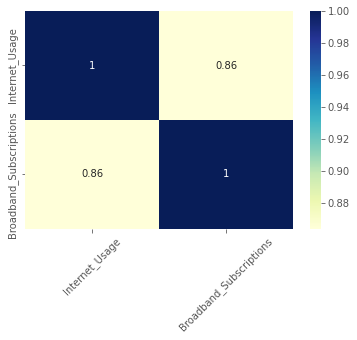

In [26]:
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')
plt.xticks(rotation = 45) 
plt.show()

## Top 5 Countries with **Highest Internet Usages 2019. How many people had internet access in those countries in 2019?**

### Summary
- Asian Countries are growing faster than ever in technology.
- Despite the High number of migrants, **India** all growth over Internet Access is almost **$2x$ in 5 years.**
    - India raised by 100 Million internet users in 2019 

### Preparing Data
- Changing the Column Name Entity to Country
- Removing ```Regions```
- Creating Top 5 Country List

In [27]:
df_people = refine_people.rename(columns={
    'Entity': 'Country'
})

### Top Regions

In [28]:
Internet_Access = df_people.groupby(['Year', 'Country'])['Users'].sum()\
                                                                        .sort_values(ascending=False)\
                                                                        .loc[[2019]]\
                                                                        .unstack()\
                                                                        .fillna(0)
Internet_Access.iloc(axis=1)[:5]

Country,World,Asia,Upper-middle-income countries,Lower-middle-income countries,High-income countries
Year,,,,,
2019,4194082864,2222069463,1689000449,1185788974,1057075175


In [29]:
# Simple Featue Extraction
regions_names = ['World',
                 'Asia',
                 'Upper-middle-income countries',
                 'Lower-middle-income countries',
                 'High-income countries',
                 'Europe',
                 'Low-income countries',
                 'Europe & Central Asia',
                 'Central Europe and the Baltics',
                 'Europe & Central Asia (IDA & IBRD)',
                 'Europe & Central Asia (excluding high income)',
                 'Latin America & Caribbean (IDA & IBRD)',
                 'Latin America & Caribbean',
                 'Latin America & Caribbean (excluding high income)',
                 'Middle East & North Africa',
                 'Middle East & North Africa (excluding high income)',
                 'Middle East & North Africa (IDA & IBRD)',
                 'European Union',
                 'North America',
                 'South America',
                 'Africa'
            ]

# Removing Regions from the main Dataset
for row in regions_names:
    index = df_people[df_people.Country == row].index
    df_access = df_people.drop(index)
    df_people = df_access

In [30]:
top_5_counties = list(top_5_2019_internet_usage.columns)

### Countries **Those with Highest Internet Use In 2019.** 
- **Internet Access**

In [31]:
Internet_Access = df_people.groupby(['Year', 'Country'])['Users'].sum()\
                                                                        .sort_values(ascending=False)\
                                                                        .unstack()\
                                                                        .fillna(0)
Top_5_Internet_Usages_Access =  Internet_Access.loc[[2019]][top_5_counties]
Top_5_Internet_Usages_Access

Country,Bahrain,Qatar,Kuwait,United Arab Emirates,Denmark
Year,,,,,
2019,1489735.0,2797495.0,4420795.0,9133361.0,5682653.0


### Countries **Those with Highest Internet Use In 2019.** 
- **Internet Access**

In [32]:
Internet_Access = df_people.groupby(['Year', 'Country'])['Users'].sum()\
                                                                        .sort_values(ascending=False)\
                                                                        .unstack()\
                                                                        .fillna(0)
Top_5_Internet_Usages_Access =  Internet_Access.loc[[2019]][top_5_counties]
Top_5_Internet_Usages_Access

Country,Bahrain,Qatar,Kuwait,United Arab Emirates,Denmark
Year,,,,,
2019,1489735.0,2797495.0,4420795.0,9133361.0,5682653.0


### **Broadband Subscriptions**

In [33]:
top_2019_Broadband_Subscriptions = df_broadband.groupby(['Year', 'Country'])['Broadband_Subscriptions'].sum()\
                                                                                                         .sort_values(ascending=False)\
                                                                                                         .loc[[2019]]\
                                                                                                         .unstack()\
                                                                                                         .fillna(0)
Top_5_internet_usags_2019_Broadband_Subscriptions = top_2019_Broadband_Subscriptions[top_5_counties]
Top_5_internet_usags_2019_Broadband_Subscriptions

Country,Bahrain,Qatar,Kuwait,United Arab Emirates,Denmark
Year,,,,,
2019,8.590934,10.051987,2.010776,31.174944,43.945988


### And The **Highest Broadband_Subscription** In 2019

In [34]:
top_2019_Broadband_Subscriptions.iloc(axis=1)[:5].round(2)

Country,Cayman Islands,Gibraltar,Monaco,Andorra,Switzerland
Year,,,,,
2019,78.52,57.85,52.55,47.13,46.82


## And The **Highest** Internet Access Countries In 2015-2019.
### **India's Growth**

In [35]:
print('Year 2015', Internet_Access.stack().sort_values(ascending=False).loc[2015].iloc[:5], '\n')

print('Year 2016', Internet_Access.stack().sort_values(ascending=False).loc[2016].iloc[:5], '\n')

print('Year 2017', Internet_Access.stack().sort_values(ascending=False).loc[2017].iloc[:5], '\n')

print('Year 2018', Internet_Access.stack().sort_values(ascending=False).loc[2018].iloc[:5], '\n')

print('Year 2019', Internet_Access.stack().sort_values(ascending=False).loc[2019].iloc[:5])

Year 2015 Country
China            701038864.0
United States    242008728.0
India            197107112.0
Brazil           119682082.0
Japan            115872194.0
dtype: float64 

Year 2016 Country
China            745805312.0
United States    279910069.0
India            220874988.0
Brazil           125920682.0
Japan            118336334.0
dtype: float64 

Year 2017 Country
China            765779840.0
United States    287824925.0
India            246463630.0
Brazil           140680972.0
Japan            116183105.0
dtype: float64 

Year 2018 Country
China            838905119.0
United States    293940279.0
India            274913663.0
Brazil           148029327.0
Russia           117781320.0
dtype: float64 

Year 2019 Country
China            911554782.0
India            406634942.0
United States    298983035.0
Brazil           156533889.0
Indonesia        128565820.0
dtype: float64


In [36]:
Indians_growth = df_people.query('Country=="India"').groupby(['Year', 'Country'])['Users'].sum()\
                                                                        .unstack()\
                                                                        .fillna(0).reset_index()
Indians_growth.head()

Country,Year,India
0,1990,0
1,1991,0
2,1992,1010
3,1993,2021
4,1994,10110


In [37]:
fig = px.line(
    Indians_growth, x='Year', y='India'
)
fig.update_layout(title='Indian\'s Growth')

#### Verifying
- 5th place Internet Access
- 5th place Broadband Subscription

In [38]:
Indonesia = df_people[df_people['Country']=='Indonesia']
Indonesia = Indonesia[Indonesia['Year']==2019]
Indonesia

,Country,Year,Users
2729,Indonesia,2019,128565820


In [39]:
Switzerland = df_broadband[df_broadband['Country']=='Switzerland']
Switzerland = Switzerland[Switzerland['Year']==2019]
Switzerland

,Country,Year,Broadband_Subscriptions
3391,Switzerland,2019,46.820499


## What are the top 5 countries with the highest internet use for each of the following regions: 
- 'Middle East & North Africa',
- 'Latin America & Caribbean',
- 'East Asia & Pacific',
- 'South Asia',
- 'North America',
- 'Europe & Central Asia'?

## Regional Progress

In [40]:

regions = 'Africa Eastern and Southern', 'Africa Western and Central', 'Latin America & Caribbean', 'East Asia & Pacific', 'South Asia', 'North America', 'European Union'
regions = df_internet[df_internet['Country'].isin(regions)]
regions.Country.unique()

array(['Africa Eastern and Southern', 'Africa Western and Central',
       'East Asia & Pacific', 'European Union',
       'Latin America & Caribbean', 'North America', 'South Asia'],
      dtype=object)

In [41]:
fig = px.line(regions, x="Year", y='Internet_Usage', color='Country')
fig.update_layout(title='Internet usage over time for seven regions')
fig.show()


In [42]:
Internet_Access = df_people.groupby(['Year', 'Country'])['Users'].sum()\
                                                                        .unstack()\
                                                                        .loc[1999:2019]\
                                                                        .fillna(0)
Internet_Access.head()

Country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Cayman Islands,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo,Costa Rica,Cote d'Ivoire,Croatia,Cuba,Curacao,Cyprus,Czechia,Democratic Republic of Congo,Denmark,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Faeroe Islands,Fiji,Finland,France,French Polynesia,Gabon,Gambia,Georgia,Germany,Ghana,Gibraltar,Greece,Greenland,Grenada,Guam,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hong Kong,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kiribati,Kosovo,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Lesotho,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,Macao,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Marshall Islands,Mauritania,Mauritius,Mexico,Micronesia (country),Moldova,Monaco,Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nauru,Nepal,Netherlands,New Caledonia,New Zealand,Nicaragua,Niger,Nigeria,North Korea,North Macedonia,Northern Mariana Islands,Norway,Oceania,Oman,Pakistan,Palau,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Puerto Rico,Qatar,Romania,Russia,Rwanda,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,Samoa,San Marino,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Korea,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Tajikistan,Tanzania,Thailand,Timor,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Turks and Caicos Islands,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,United States Virgin Islands,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1999,0.0,2613.0,60548.0,0.0,5015.0,11421.0,3914.0,1203862.0,31122.0,3915.0,7667715.0,1841559.0,8039.0,12057.0,32671.0,45848.0,6278.0,51014.0,1408102.0,9489.0,10516.0,24370.0,786.0,82856.0,8072.0,18986.0,3536921.0,0.0,25089.0,237372.0,7125.0,2423.0,3804.0,18972.0,11000597.0,5216.0,0.0,1495.0,984.0,622752.0,8890827.0,655070.0,780.0,507.0,152324.0,19400.0,202881.0,34837.0,0.0,105667.0,700304.0,477.0,1627453.0,761.0,2015.0,92924.0,102197.0,203044.0,50082.0,638.0,601.0,203519.0,4794.0,8162.0,10085.0,7761.0,1668203.0,5324824.0,8513.0,3090.0,9997.0,18296.0,17001352.0,20116.0,1646.0,756080.0,12125.0,2642.0,13460.0,67939.0,4971.0,1420.0,3032.0,5800.0,37153.0,1410133.0,599272.0,114648.0,2842899.0,937704.0,244081.0,0.0,406729.0,805373.0,8187795.0,61160.0,27071762.0,125104.0,70831.0,34237.0,1058.0,0.0,89295.0,9988.0,2018.0,106454.0,228516.0,1073.0,316.0,6758.0,0.0,106222.0,74656.0,39199.0,26524.0,9578.0,2752575.0,3115.0,6650.0,30728.0,520.0,3104.0,56079.0,1789358.0,3121.0,25854.0,0.0,12348.0,0.0,49477.0,9753.0,68.0,5979.0,0.0,35411.0,6194702.0,12351.0,1590689.0,25143.0,3160.0,49122.0,0.0,30303.0,0.0,1784859.0,9345328.0,58177.0,82867.0,0.0,112924.0,35500.0,19182.0,512574.0,1091588.0,2092816.0,1508638.0,200629.0,24966.0,594520.0,1501335.0,5381.0,1974.0,3058.0,3172.0,520.0,11312.0,515.0,103701.0,29487.0,0.0,4911.0,2170.0,958122.0,292259.0,250486.0,2073.0,1166.0,1908486.0,10956586.0,0.0,2872433.0,65050.0,2254.0,8901.0,3666338.0,2428348.0,19764.0,2030.0,25169.0,1515010.0,0.0,28739.0,1038.0,77159.0,156853.0,1448289.0,2026.0,0.0,0.0,24570.0,199937.0,462861.0,12485568.0,100083031.0,11943.0,327003.0,7550.0,1009.0,680620.0,100722.0,10258.0,14148.0,18943.0
2000,0.0,3631.0,

### Feature Engineering [Regions]

In [43]:
# Defining The Regions
regions_internet_access = {
    'Middle East and North Africa': Internet_Access[['Algeria', 'Qatar', 'Bahrain','Kuwait','Saudi Arabia', 'Djibouti','Lebanon', 'Egypt', 'Tunisia', 'Iran', 'Malta','United Arab Emirates', 'Iraq','Morocco','Israel','Oman']],
    'Latin America & the Caribbean': Internet_Access[['Paraguay','Argentina','Peru','Dominican Republic', 'Puerto Rico', 'Bahamas', 'El Salvador', 'Bolivia', 'Guatemala', 'Brazil', 'Haiti', 'Suriname', 'Honduras', 'Chile', 'Colombia', 'Mexico', 'Uruguay','Costa Rica', 'Nicaragua', 'Cuba','Panama']],
    'East Asia & Pacific': Internet_Access[['Philippines', 'Australia', 'China', 'Singapore', 'Malaysia','Thailand', 'Mongolia', 'Myanmar', 'Hong Kong','Indonesia', 'Japan','New Zealand', 'Kiribati', 'Vietnam', 'South Korea']],
    'South Asia': Internet_Access[['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka']],
    'North America': Internet_Access[['Canada','United States']],
    'Europe & Central Asia': Internet_Access[['Albania',  'Norway', 'Greece', 'Poland', 'Armenia', 'Portugal', 'Austria', 'Hungary', 'Romania', 'Azerbaijan', 'Iceland','Belarus', 'Ireland','Belgium', 'Serbia', 'Italy', 'Bulgaria', 'Kazakhstan', 'Slovenia', 'Spain', 'Croatia', 'Sweden', 'Cyprus' ,'Latvia', 'Switzerland', 'Denmark', 'Lithuania', 'Turkey','Estonia', 'Luxembourg','Ukraine', 'Finland','United Kingdom', 'France', 'Montenegro', 'Uzbekistan', 'Russia', 'Georgia', 'Netherlands', 'Germany', 'North Macedonia']]
            }

### Top 5 South Asian Countries [2019]

In [44]:
regions_internet_access['South Asia'].stack().sort_values(ascending=False).loc[2019].iloc[:5]

Country
India          406634942.0
Bangladesh      39392860.0
Pakistan        38118177.0
Nepal            9457060.0
Afghanistan      6647431.0
dtype: float64

In [45]:
South_Asia = regions_internet_access['South Asia'].reset_index()
fig = px.line(South_Asia, x="Year", y=South_Asia.columns, markers=True)
fig.update_layout(title='South Asia')
fig.show()

### Top 5 Middle East and North Africa [2019]

In [46]:
regions_internet_access['Middle East and North Africa'].stack().sort_values(ascending=False).loc[2019].iloc[:5]

Country
Iran            67321708.0
Egypt           60501404.0
Saudi Arabia    34295651.0
Morocco         27001880.0
Iraq            24938114.0
dtype: float64

In [47]:
Middle_East_North_Africa = regions_internet_access['Middle East and North Africa'].reset_index()
fig = px.line(Middle_East_North_Africa, x="Year", y=Middle_East_North_Africa.columns, markers=True)
fig.update_layout(title='Middle East and North Africa')
fig.show()

### Top 5 Latin America & the Caribbean [2019]

In [48]:
regions_internet_access['Latin America & the Caribbean'].stack().sort_values(ascending=False).loc[2019].iloc[:5]

Country
Brazil       156533889.0
Mexico        87647163.0
Argentina     35751668.0
Colombia      32625274.0
Peru          19678670.0
dtype: float64

In [49]:
Latin_America_the_Caribbean = regions_internet_access['Latin America & the Caribbean'].reset_index()
fig = px.line(Latin_America_the_Caribbean, x="Year", y=Latin_America_the_Caribbean.columns, markers=True)
fig.update_layout(title='Latin America & the Caribbean')
fig.show()

### North America [2019]

In [50]:
regions_internet_access['North America'].stack().sort_values(ascending=False).loc[2019].iloc[:5]

Country
United States    298983035.0
Canada            36209294.0
dtype: float64

In [51]:
North_America = regions_internet_access['North America'].reset_index()
fig = px.line(North_America, x="Year", y=North_America.columns, markers=True)
fig.update_layout(title='North America')
fig.show()

### Top 5 Europe & Central Asia [2019]

In [52]:
regions_internet_access['Europe & Central Asia'].stack().sort_values(ascending=False).loc[2019].iloc[:5]

Country
Russia            120444573.0
Germany            73282212.0
United Kingdom     61781367.0
Turkey             61756998.0
France             53670595.0
dtype: float64

In [53]:
Europe_Central_Asia = regions_internet_access['Europe & Central Asia'].reset_index()
fig = px.line(Europe_Central_Asia, x="Year",
              y=Europe_Central_Asia.columns,
              markers=True)
fig.update_layout(title='Europe & Central Asia')
fig.show()

### Top 5 East Asia & Pacific [2019]

In [54]:
regions_internet_access['East Asia & Pacific'].stack().sort_values(ascending=False).loc[2019].iloc[:5]


Country
China          911554782.0
Indonesia      128565820.0
Japan          116647128.0
Vietnam         65761807.0
South Korea     49813310.0
dtype: float64

In [55]:
East_Asia_Pacific = regions_internet_access['East Asia & Pacific'].reset_index()

fig = px.line(East_Asia_Pacific, x="Year", y=East_Asia_Pacific.columns, markers=True)
fig.update_layout(title='East Asia & Pacific')
fig.show()

#### Verification

In [56]:
China = df_people[df_people['Country'] == 'China']
China = China[China['Year'] == 2019]
China

,Country,Year,Users
1230,China,2019,911554782


### Interesting Sight

| Country | Population |Internet Users |
| --------------- | ------------------------- | -------------------------- | 
| China | 1.408 billion (2019) | 911.554782 million |
| Indonesia | 270.6 million (2019) | 128.565820 million |
| South Korea | 51.76 million (2019) | 49.813310 million |

## Overview

### Joining Table
####  The Tables are going to be joined on ```Country``` and ```Year```Columns. Since These columns are the most Unique.

In [57]:
df = df_people.merge(df_internet, on=['Country', 'Year'], how='inner')\
                .merge(df_broadband, on=['Country', 'Year'], how='inner')

In [58]:
df = df.groupby(['Year', 'Country'])['Users'].sum().fillna(0).reset_index()
df.head()

,Year,Country,Users
0,1998,Belgium,803532
1,1998,Brazil,2527755
2,1998,Canada,7505275
3,1998,France,3670549
4,1998,Hong Kong,952187


In [59]:
fig = px.choropleth(df, locations="Country", color="Users", 
                    locationmode='country names',
                    animation_frame='Year',
                    range_color=[20,140],
                    color_continuous_scale=px.colors.sequential.YlGnBu,
                    height = 550,
                    width = 840
                   )

fig.update_layout(title='Internet Usage by Country')
fig.show()

In [60]:
re_df = df_people.merge(df_internet, on=['Country', 'Year'], how='inner')\
                .merge(df_broadband, on=['Country', 'Year'], how='inner')
re_df = re_df.groupby(['Country', 'Year'])['Users', 'Internet_Usage','Broadband_Subscriptions'].mean().reset_index()
re_df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Country,Year,Users,Internet_Usage,Broadband_Subscriptions
0,Afghanistan,2004,24922.0,0.105809,0.000809
1,Afghanistan,2005,298829.0,1.224148,0.000858
2,Afghanistan,2006,536114.0,2.107124,0.001892
3,Afghanistan,2007,492163.0,1.900000,0.001845
4,Afghanistan,2008,486261.0,1.840000,0.001804


In [61]:
fig  = px.scatter(
       re_df, x='Users', y='Broadband_Subscriptions',
       animation_frame='Year',
       size='Internet_Usage', color='Country',
       log_x=True, size_max=50,
       range_x=[1000, 100000000], range_y=[-15, 95],
       height=500
)

fig.update_layout(title='Internet Usage by Country')
fig.show()

## Thank You